# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [108]:
# Installing the libraries with the specified versions (uses current Python interpreter)
import sys
%pip install -q numpy pandas scikit-learn matplotlib seaborn joblib xgboost requests huggingface_hub

Note: you may need to restart the kernel to use updated packages.


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [109]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [110]:
local_data_path = "SuperKart.csv"

local_data = pd.read_csv(local_data_path)

kartData = local_data.copy()

kartData.shape

(8763, 12)

# **Data Overview**

In [111]:
kartData.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [112]:
# check column names and types
kartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [113]:
# Short summary lines derived from the checks
missing_cols = kartData.isnull().sum()
num_missing_cols = (missing_cols > 0).sum()
print(f"\nColumns with missing values: {num_missing_cols} (use `kartData.isnull().sum()` to see counts per column)")



Columns with missing values: 0 (use `kartData.isnull().sum()` to see counts per column)


In [114]:
# null check and missing values check
kartData.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

In [115]:
# Check for total number of duplicate rows in the dataset
duplicate_count = kartData.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [116]:
# Count the number of unique values in each column
kartData.nunique().sort_values()

Store_Size                      3
Store_Location_City_Type        3
Product_Sugar_Content           4
Store_Id                        4
Store_Establishment_Year        4
Store_Type                      4
Product_Type                   16
Product_Allocated_Area        228
Product_Weight               1113
Product_MRP                  6100
Product_Store_Sales_Total    8668
Product_Id                   8763
dtype: int64

This matches the description above except for product sugar values, lets see why it defers

In [117]:
# checking unique values for Product_Sugar_Content
kartData['Product_Sugar_Content'].unique()

array(['Low Sugar', 'Regular', 'No Sugar', 'reg'], dtype=object)

- ok we see reg and Regular are present, we need to clean this and make them same so that we have on 3 unique types as descibed in the description

**Data Overview — brief summary**

- 12 columns and 8763 rows.
- we see mostly object ,float and int data types
- The printed missing-value counts show there are no missing or null values in columns


# **Exploratory Data Analysis (EDA)**

In [118]:
# before going to EDA lets correct the Product_Sugar_Content column values
kartData['Product_Sugar_Content'] = kartData['Product_Sugar_Content'].replace({'Reg': 'Regular', 'reg': 'Regular'})

In [119]:
# checking unique values for Product_Sugar_Content after correction
kartData['Product_Sugar_Content'].unique()

array(['Low Sugar', 'Regular', 'No Sugar'], dtype=object)

## Univariate Analysis

In [120]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import math
def histogram_plot(cols, n_num):
    ncols = 2
    nrows = math.ceil(n_num / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(kartData[col].dropna(), bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_ylabel('Count')
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

In [121]:
def barPlot(cols, n_cat):
    ncols = 2
    nrows = math.ceil(n_cat / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        kartData[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Bar Plot of {col}')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

In [122]:
# Identify numerical and categorical columns
num_cols = kartData.select_dtypes(include=[float, int]).columns.tolist()
cat_cols = kartData.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numerical columns: {num_cols}')
print(f'Categorical columns: {cat_cols}')

# Descriptive statistics for numerical columns
if num_cols:
    display(kartData[num_cols].describe().T)
else:
    print('No numerical columns found')

Numerical columns: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year', 'Product_Store_Sales_Total']
Categorical columns: ['Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']


,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


#### Observation
- scaling might be required on numerical columns

In [123]:
for col in cat_cols:
    print(f'\nValue counts for categorical column: {col}')
    display(kartData[col].value_counts().sort_values().head(10))


Value counts for categorical column: Product_Id


Product_Id
FD6114    1
NC1180    1
FD5680    1
FD5484    1
NC5885    1
FD1961    1
NC6657    1
DR2699    1
FD6027    1
FD8553    1
Name: count, dtype: int64


Value counts for categorical column: Product_Sugar_Content


Product_Sugar_Content
No Sugar     1519
Regular      2359
Low Sugar    4885
Name: count, dtype: int64


Value counts for categorical column: Product_Type


Product_Type
Seafood                76
Breakfast             106
Starchy Foods         141
Others                151
Hard Drinks           186
Breads                200
Soft Drinks           519
Meat                  618
Health and Hygiene    628
Canned                677
Name: count, dtype: int64


Value counts for categorical column: Store_Id


Store_Id
OUT002    1152
OUT003    1349
OUT001    1586
OUT004    4676
Name: count, dtype: int64


Value counts for categorical column: Store_Size


Store_Size
Small     1152
High      1586
Medium    6025
Name: count, dtype: int64


Value counts for categorical column: Store_Location_City_Type


Store_Location_City_Type
Tier 3    1152
Tier 1    1349
Tier 2    6262
Name: count, dtype: int64


Value counts for categorical column: Store_Type


Store_Type
Food Mart             1152
Departmental Store    1349
Supermarket Type1     1586
Supermarket Type2     4676
Name: count, dtype: int64

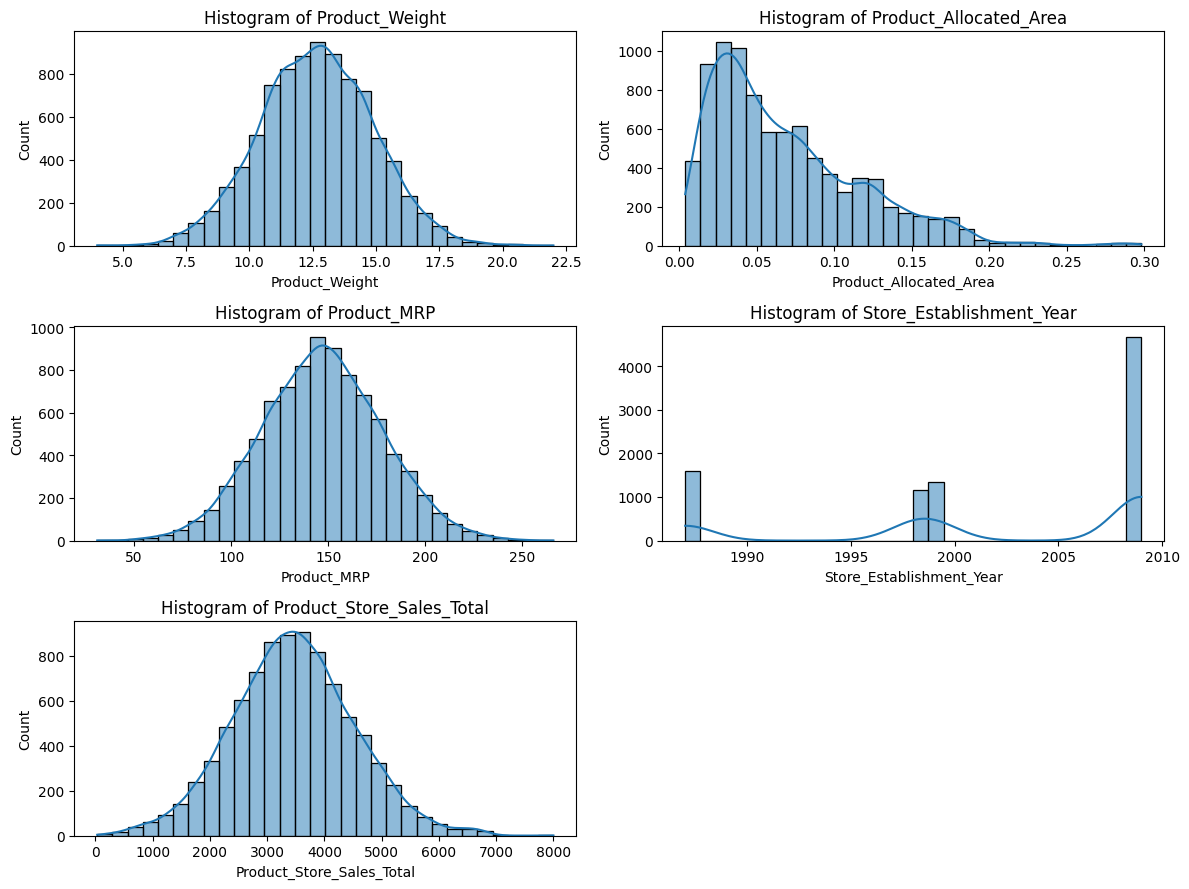

In [124]:
# Univariate analysis: numerical and categorical summaries

n_num = len(num_cols)

histogram_plot(num_cols, n_num)


- most of the stores show the establishment year after 2009
- store establishment year is left skewed, seems like stores expanded after 2009 ,given only 4 store id's
- product allocated area appears to be right skewed , otherwise other columns appear to be a normal distribution

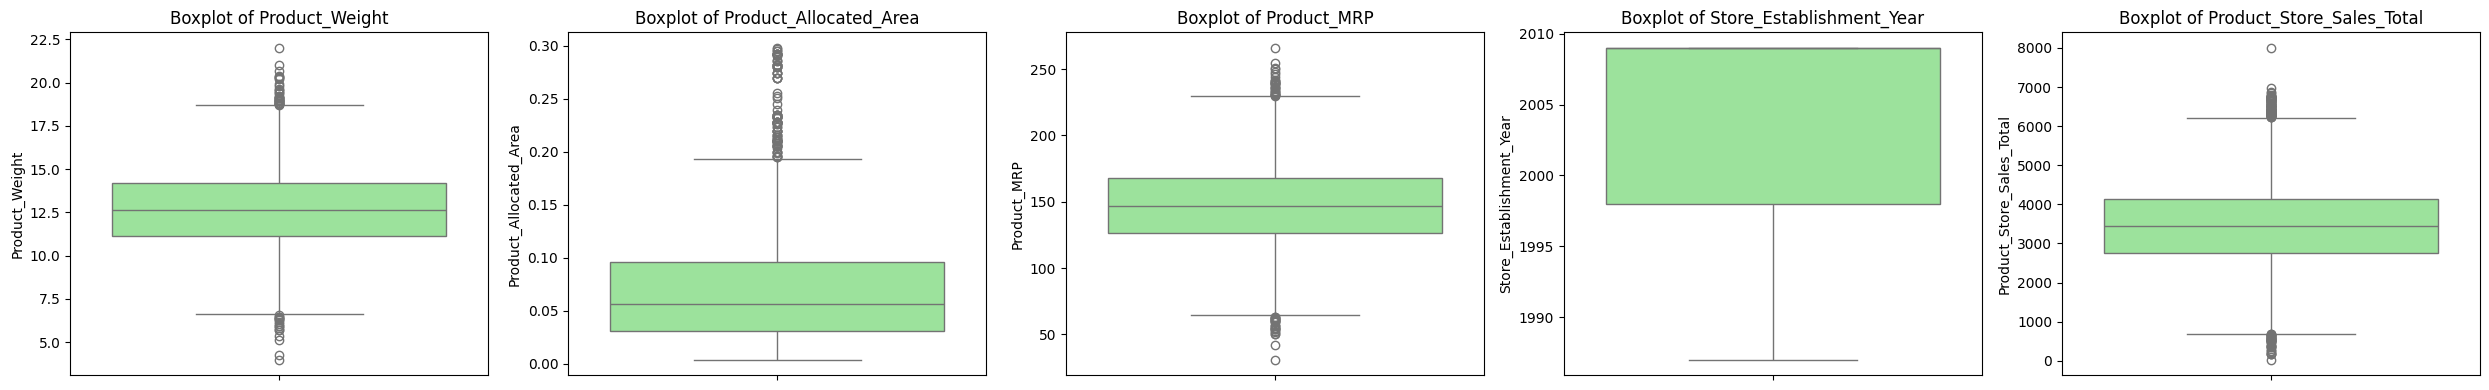

In [125]:
# Boxplots for important numerical variables
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 4))
if len(num_cols) == 1:
    axes = [axes]
for i, col in enumerate(num_cols):
    sns.boxplot(y=kartData[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

- As observed earlier, product allocated area shows some outliers beyond 75th percentile, might be some big items or frequently cleared itesm to occupy larger area's.
- lets treat this informative rather than jumping to conclusion of error.

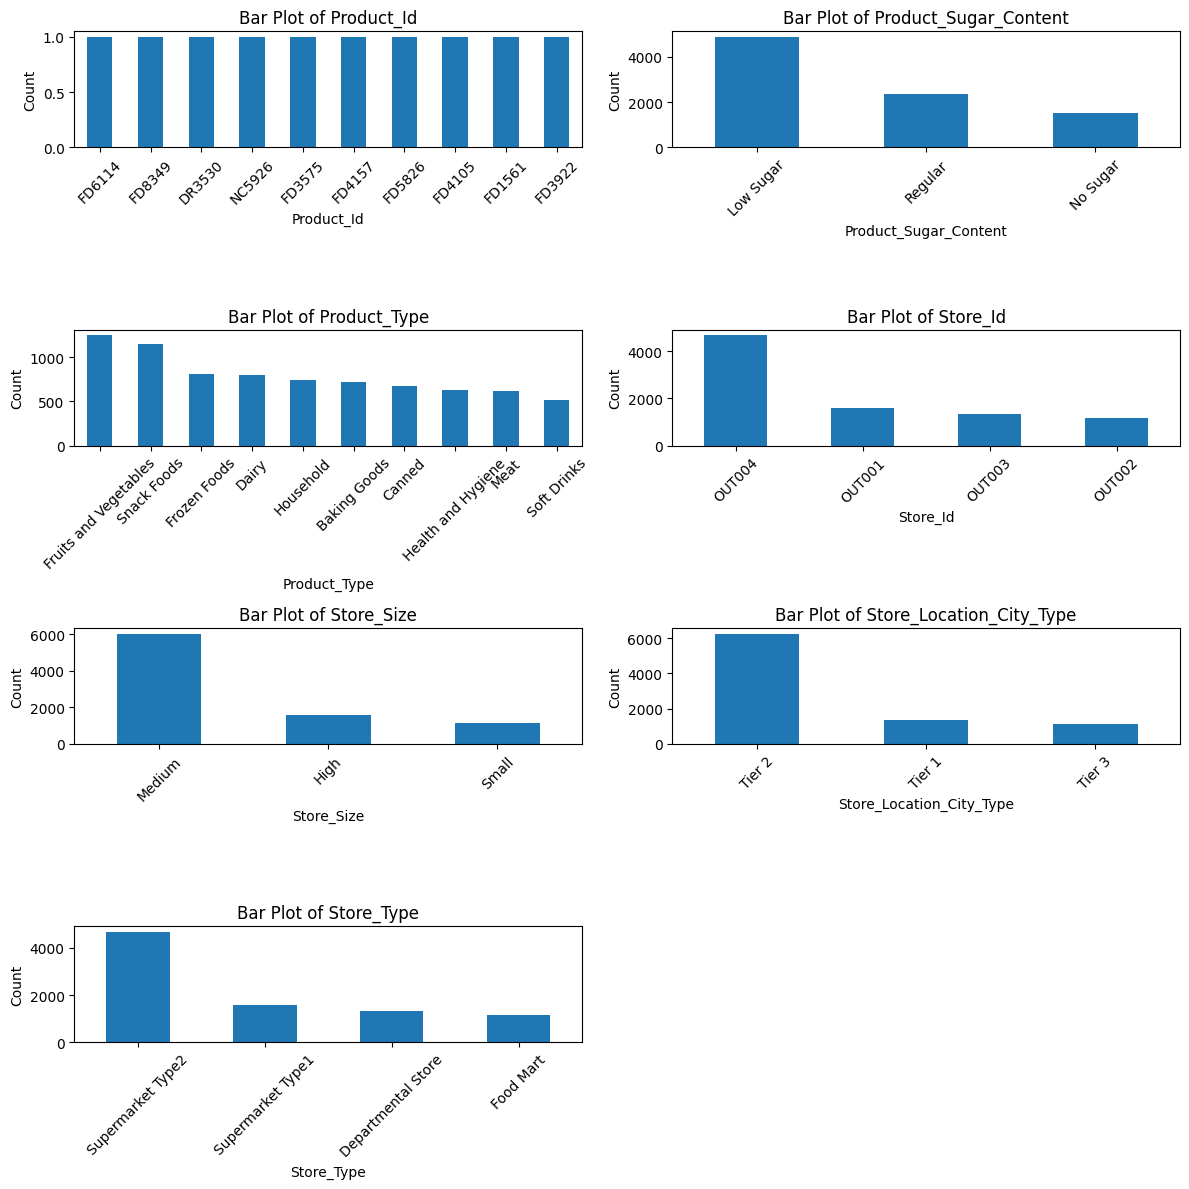

In [126]:
n_num = len(cat_cols)

barPlot(cat_cols, n_num)

- counts of supermarket type-2, tier 2 and medium are high
- out004 has more orders
- Low sugar item sales are high
- veggis, snacks, frozen and dairy are more

## Bivariate Analysis

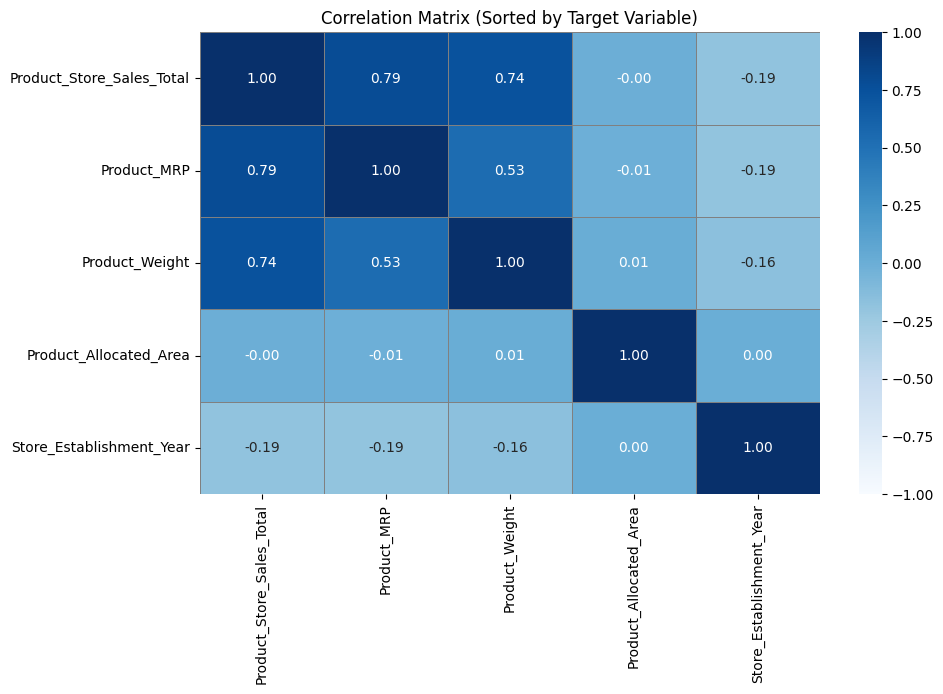

In [127]:
target = 'Product_Store_Sales_Total'
# correlation matrix for numerical variables 
corr_matrix= kartData[num_cols].corr()

sorted_corr = corr_matrix[target].sort_values(ascending=False)

# Visualize only top N correlated features
top_features = sorted_corr.index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[top_features, top_features],
    annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1, linewidths=0.5, linecolor="gray"
)
plt.title("Correlation Matrix (Sorted by Target Variable)")
plt.show()

- with our target variable, we can clearly see product_mrp and product_weight are having high correlation
- product-allocated-area is not a big factor for target variable

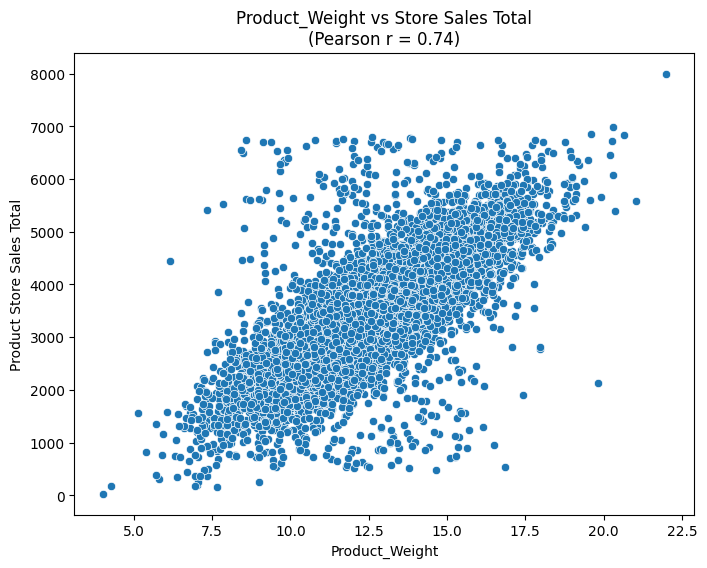

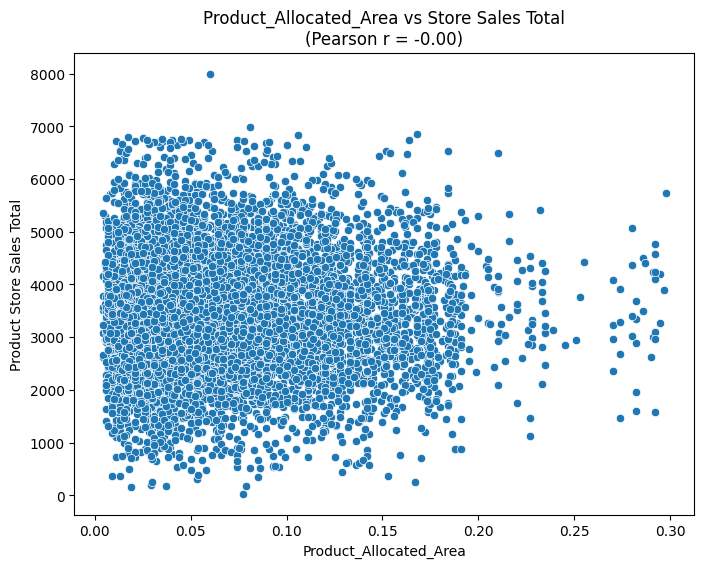

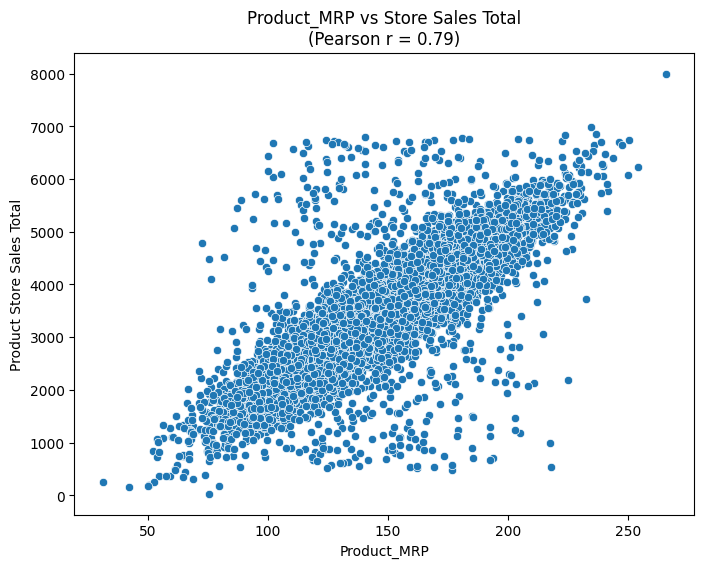

In [128]:
for feature in ["Product_Weight", "Product_Allocated_Area", "Product_MRP"]:
    plt.figure(figsize=[8, 6])
    sns.scatterplot(x=kartData[feature], y=kartData["Product_Store_Sales_Total"])
    corr = kartData[feature].corr(kartData["Product_Store_Sales_Total"])
    plt.title(f"{feature} vs Store Sales Total\n(Pearson r = {corr:.2f})")
    plt.xlabel(feature)
    plt.ylabel("Product Store Sales Total")
    plt.show()

#### Observations
- Product MRP and Product Weight are  more strongly correlated with sales revenue.
- Product Allocated Area has a weak  correlation with sales revenue.

The scatter plots visually confirm these relationships: stronger correlations show clearer trends, while weaker ones appear more scattered.


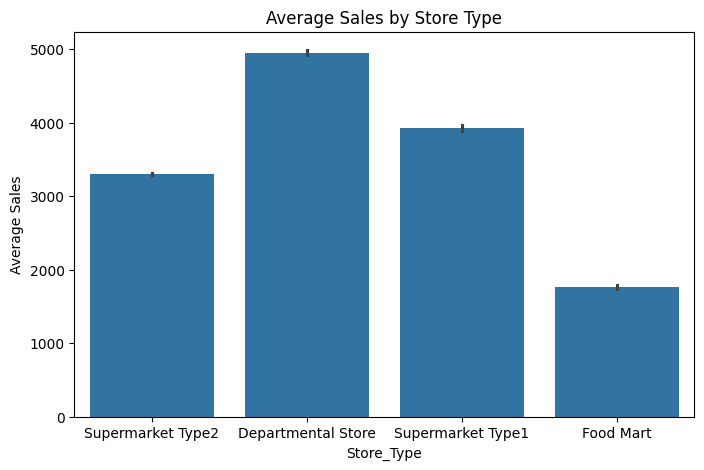

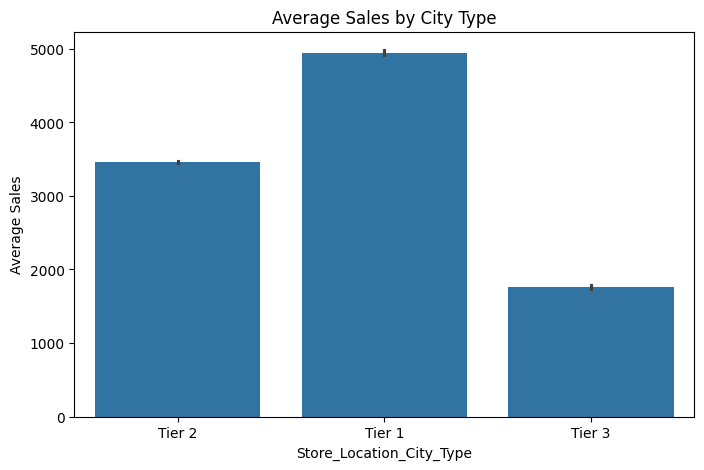

In [129]:
# Store Type vs Sales
plt.figure(figsize=(8,5))
sns.barplot(x="Store_Type", y="Product_Store_Sales_Total", data=kartData, estimator=np.mean)
plt.title("Average Sales by Store Type")
plt.ylabel("Average Sales")
plt.show()

# Store Location City Type vs Sales
plt.figure(figsize=(8,5))
sns.barplot(x="Store_Location_City_Type", y="Product_Store_Sales_Total", data=kartData, estimator=np.mean)
plt.title("Average Sales by City Type")
plt.ylabel("Average Sales")
plt.show()

- departmental Store shows big sales 
- Tier 1 locations show higher sales due to high purchasing power and population
(might need more data like population and avg salaries etc)

Product_Type
Fruits and Vegetables    4300833.27
Snack Foods              3988996.95
Dairy                    2811918.04
Frozen Foods             2809980.83
Household                2564740.17
Baking Goods             2452986.00
Canned                   2300082.71
Health and Hygiene       2163707.21
Meat                     2129211.94
Soft Drinks              1797044.72
Breads                    714942.24
Hard Drinks               625814.62
Others                    541496.30
Starchy Foods             518774.45
Breakfast                 362130.41
Seafood                   272404.04
Name: Product_Store_Sales_Total, dtype: float64


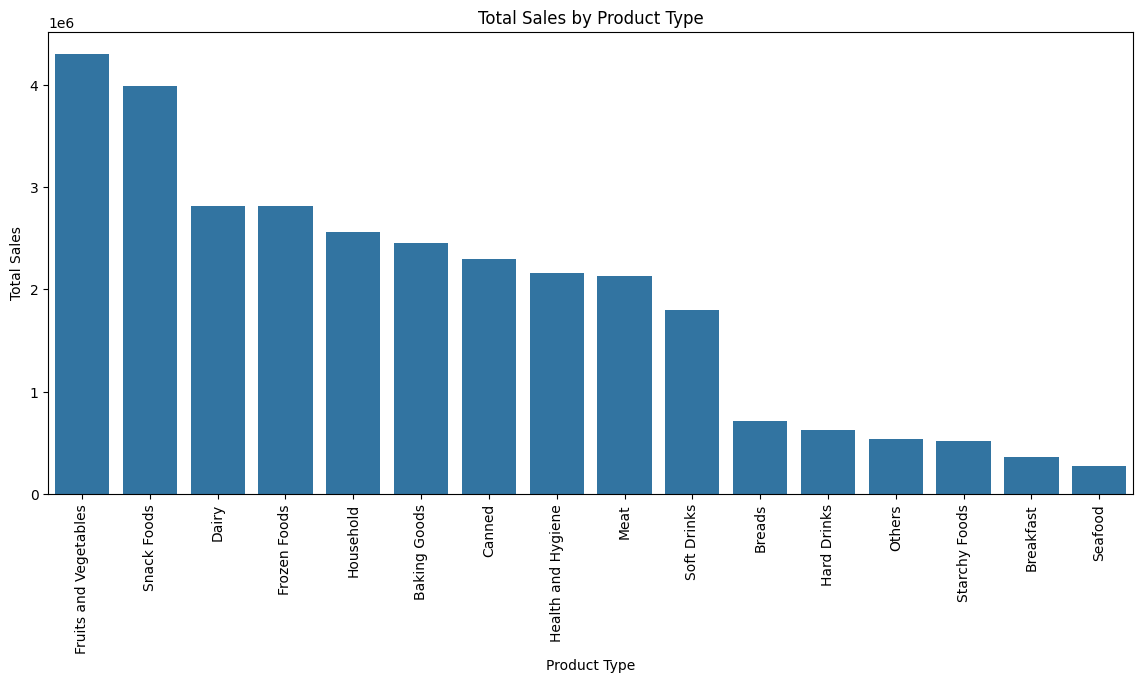

In [130]:
# Group by Product_Type and sum Product_Store_Sales_Total
product_sales = kartData.groupby("Product_Type")["Product_Store_Sales_Total"].sum().sort_values(ascending=False)
print(product_sales)

# Optional: Visualize the results
plt.figure(figsize=(14, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Product Type")
plt.ylabel("Total Sales")
plt.xlabel("Product Type")
plt.show()

- Looks like the sales is on more perishable items like vegetables or dairy etc

In [131]:
def plot_categorical_insights(df, cat_col, target='Product_Store_Sales_Total'):
    # Barplot (Mean Aggregation)
    plt.figure(figsize=(10, 5))
    mean_values = df.groupby(cat_col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=mean_values.index, y=mean_values.values)
    plt.title(f'Average {target} by {cat_col} (Barplot)')
    plt.ylabel(f'Mean {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Spacer
    print("\n")

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cat_col, y=target, data=df)
    plt.title(f'Distribution of {target} by {cat_col} (Boxplot)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

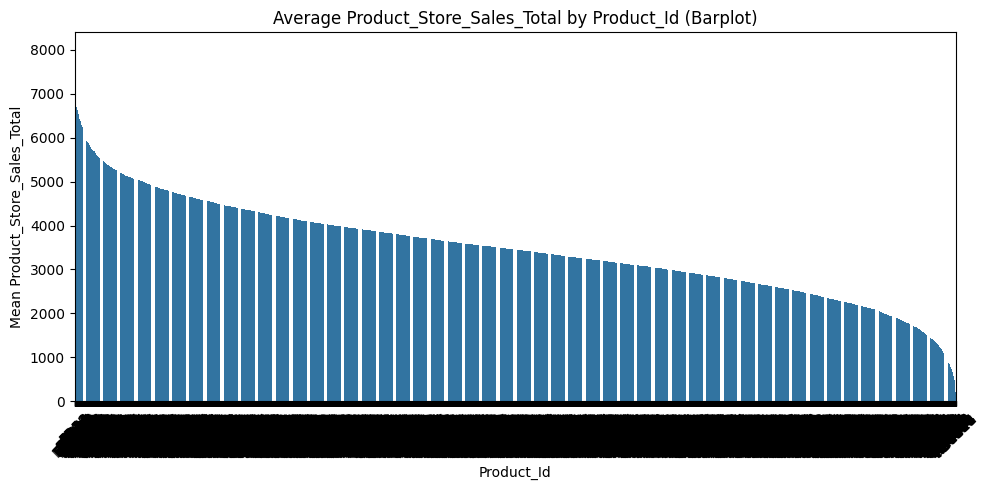

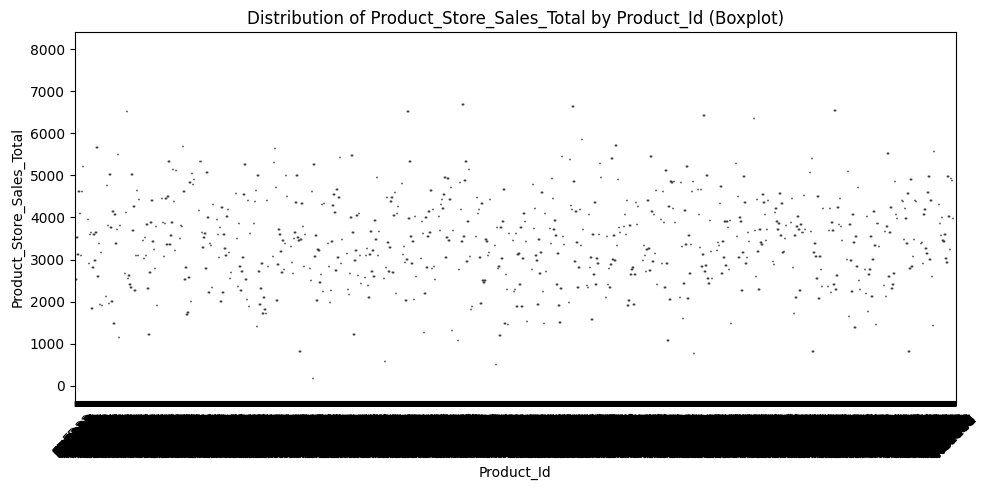

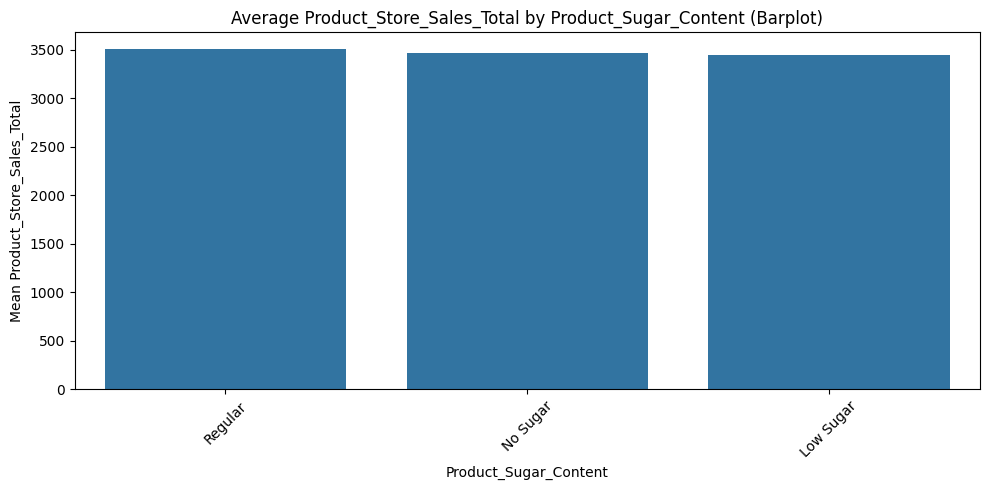

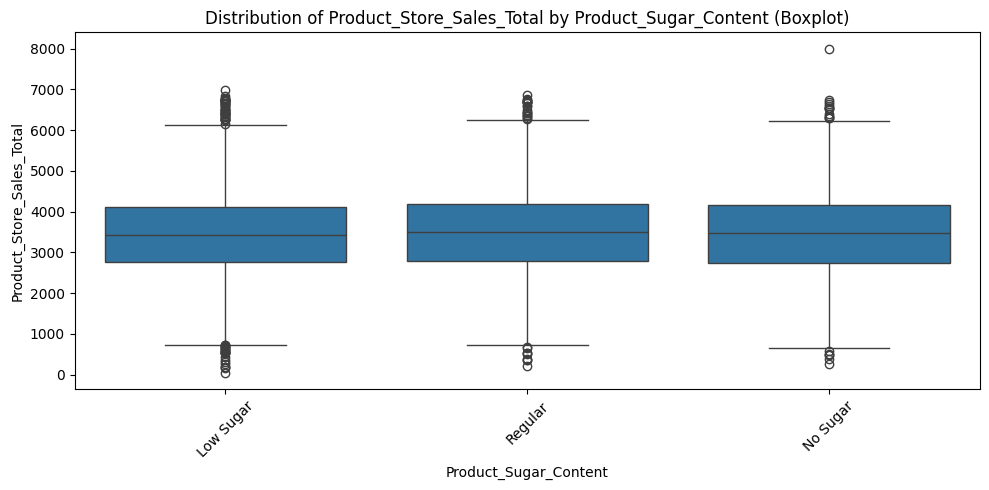

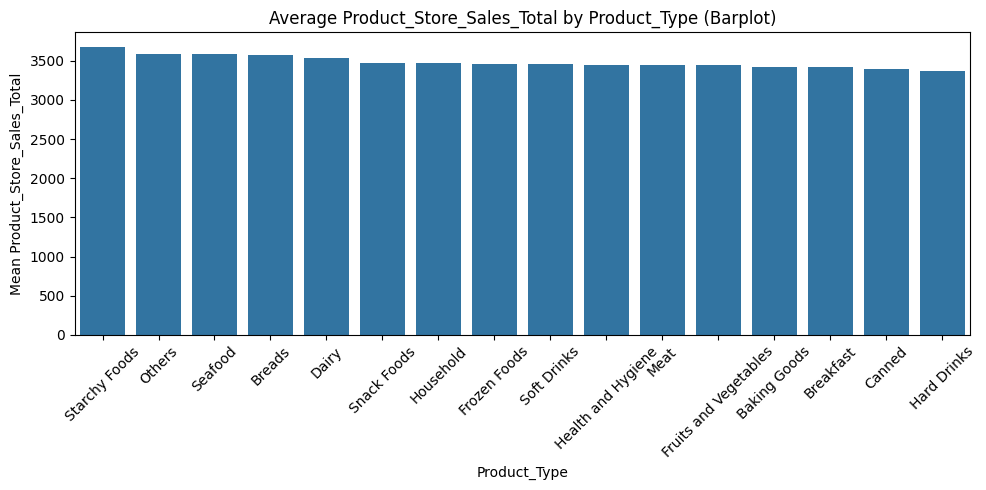

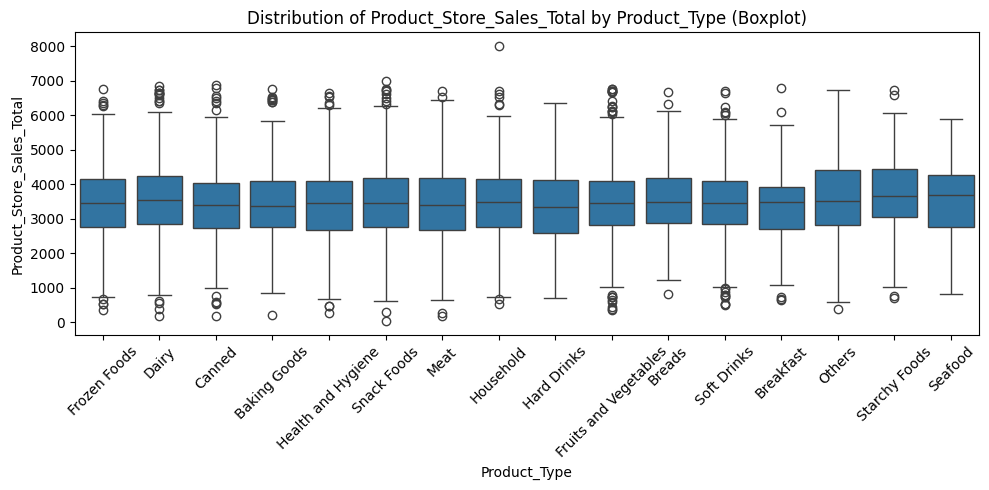

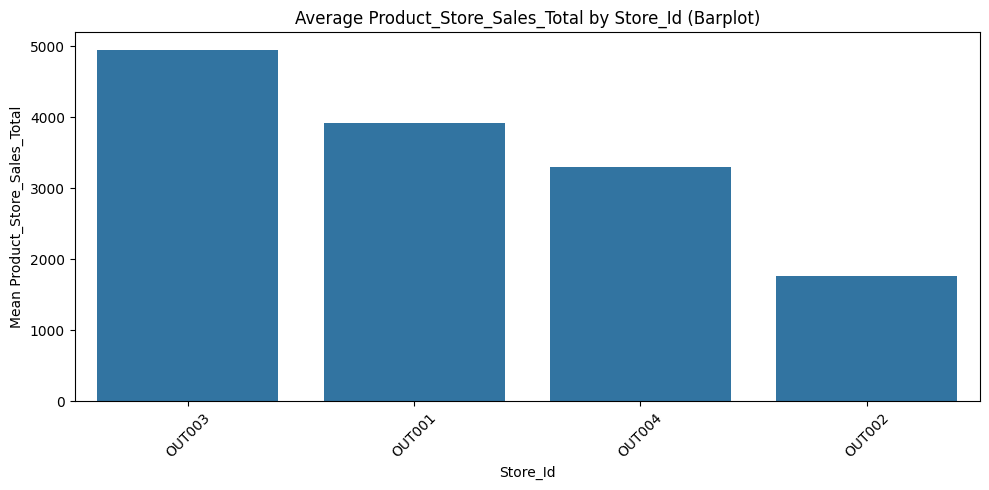

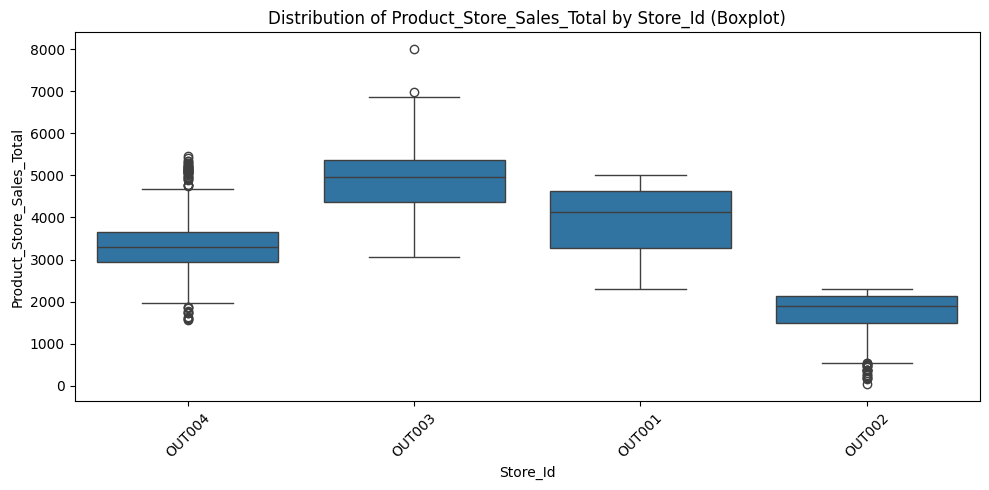

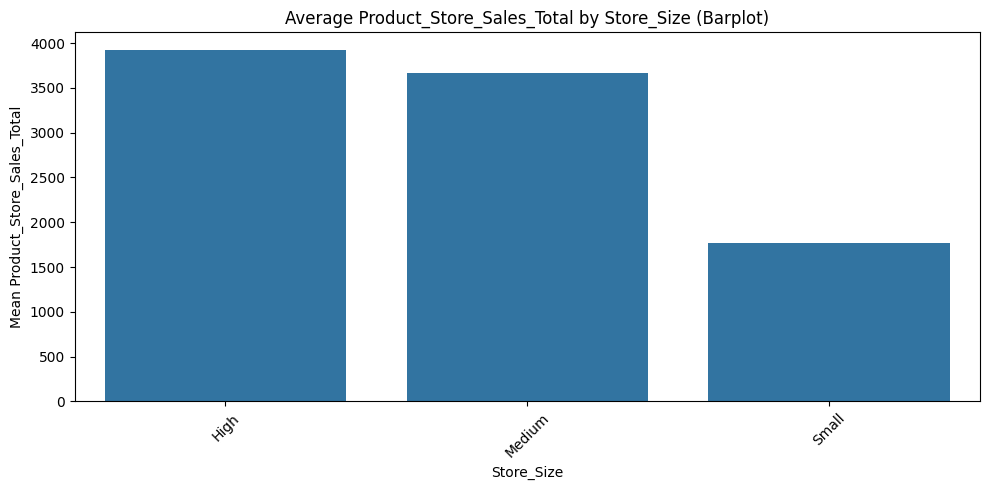

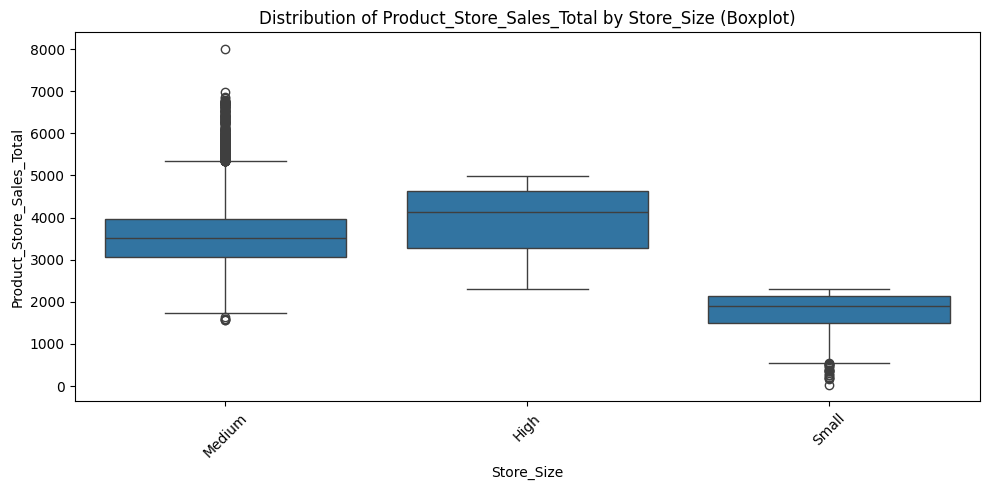

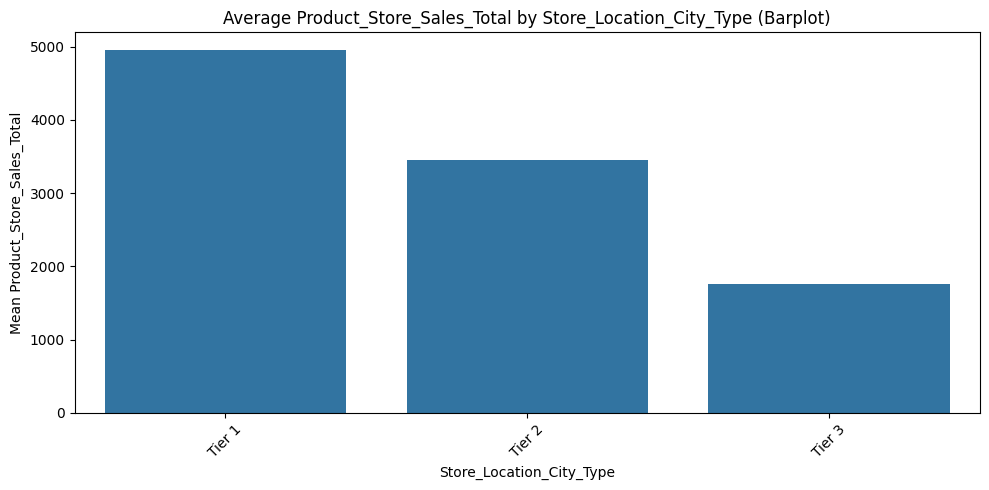

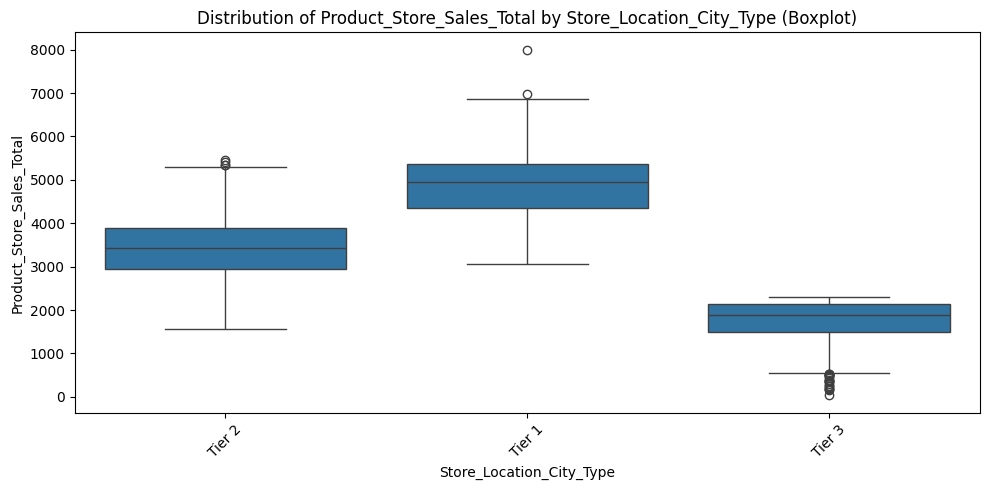

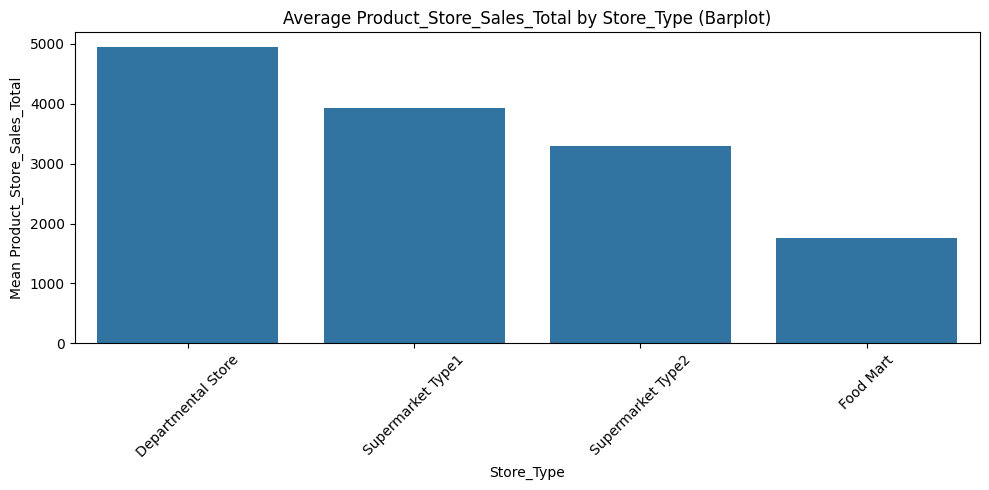

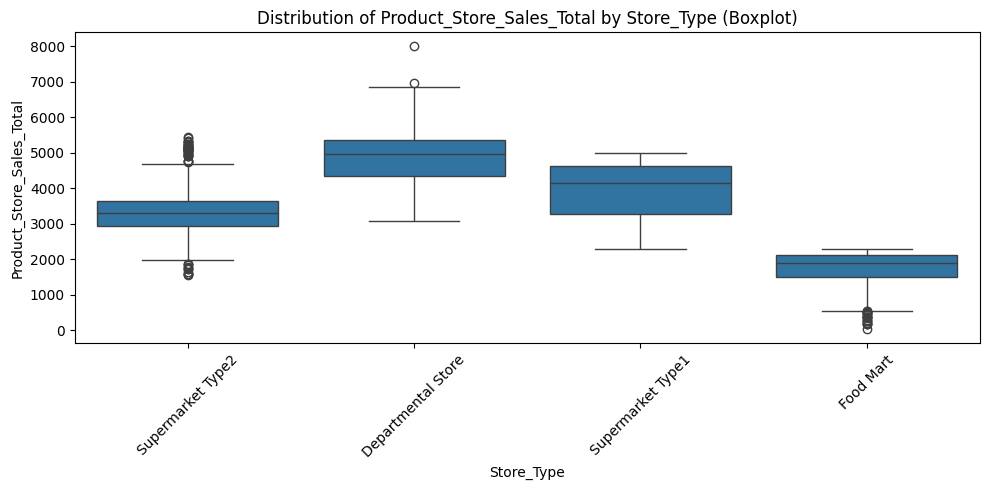

In [132]:
for col in cat_cols:
    plot_categorical_insights(kartData, col)

In [133]:
# check outliers in all columns
outlier_counts = {}

for col in num_cols:
    Q1 = kartData[col].quantile(0.25)
    Q3 = kartData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = kartData[(kartData[col] < lower) | (kartData[col] > upper)][col]
    outlier_counts[col] = outliers.count()

print("Outlier counts for each numerical column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier counts for each numerical column:
Product_Weight: 54
Product_Allocated_Area: 104
Product_MRP: 57
Store_Establishment_Year: 0
Product_Store_Sales_Total: 119


In [134]:
kartData.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [135]:
# Replace Store_Establishment_Year with Store_Age (2025 - Store_Establishment_Year)
kartData['Store_Age'] = 2025 - kartData['Store_Establishment_Year']
kartData.drop('Store_Establishment_Year', axis=1, inplace=True)

kartData.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,16
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,26
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,38
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,38
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,27


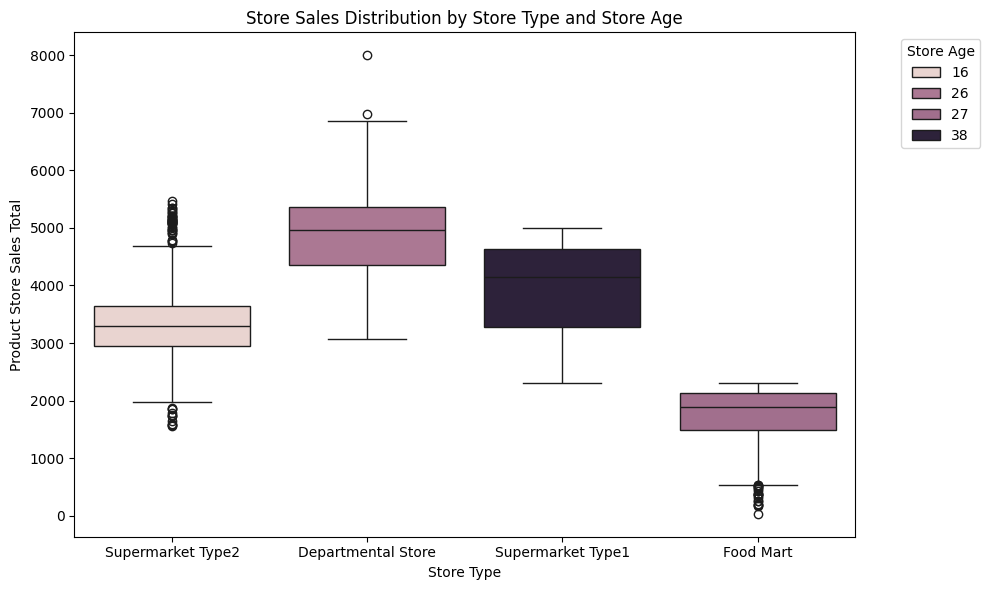

In [136]:
# Plot Store_Age and Store_Type with Product_Store_Sales_Total
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store_Type', y='Product_Store_Sales_Total', hue='Store_Age', data=kartData)
plt.title('Store Sales Distribution by Store Type and Store Age')
plt.ylabel('Product Store Sales Total')
plt.xlabel('Store Type')
plt.legend(title='Store Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Product_Id_Prefix
FD    6539
NC    1519
DR     705
Name: count, dtype: int64


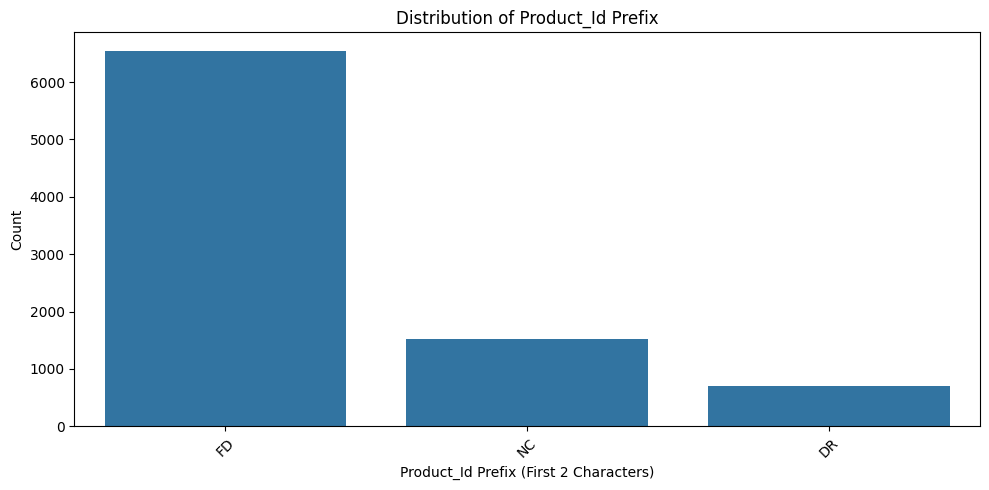

In [137]:
# Extract first two characters from Product_Id
kartData['Product_Id_Prefix'] = kartData['Product_Id'].str[:2]

# Check value counts
print(kartData['Product_Id_Prefix'].value_counts())

# Visualize distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Product_Id_Prefix', data=kartData, order=kartData['Product_Id_Prefix'].value_counts().index)
plt.title('Distribution of Product_Id Prefix')
plt.xlabel('Product_Id Prefix (First 2 Characters)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

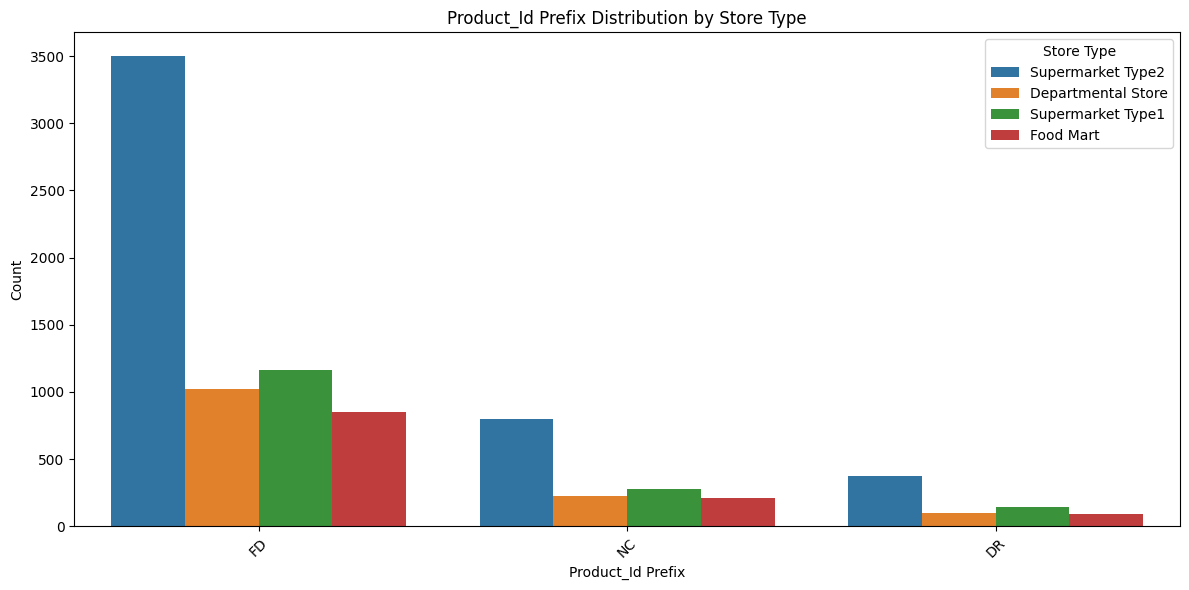

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product_Id_Prefix', hue='Store_Type', data=kartData, order=kartData['Product_Id_Prefix'].value_counts().index)
plt.title('Product_Id Prefix Distribution by Store Type')
plt.xlabel('Product_Id Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

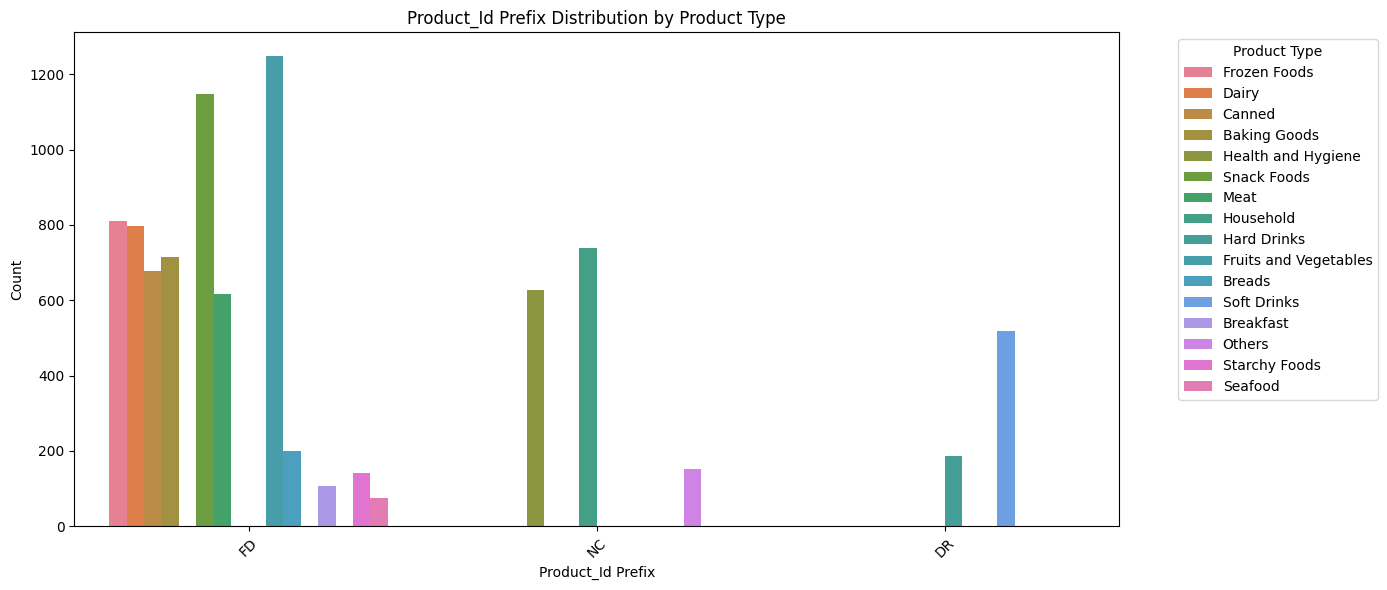

In [139]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Product_Id_Prefix', hue='Product_Type', data=kartData, order=kartData['Product_Id_Prefix'].value_counts().index)
plt.title('Product_Id Prefix Distribution by Product Type')
plt.xlabel('Product_Id Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Product_Id_Prefix
FD    22662260.88
NC     5269943.68
DR     2422859.34
Name: Product_Store_Sales_Total, dtype: float64


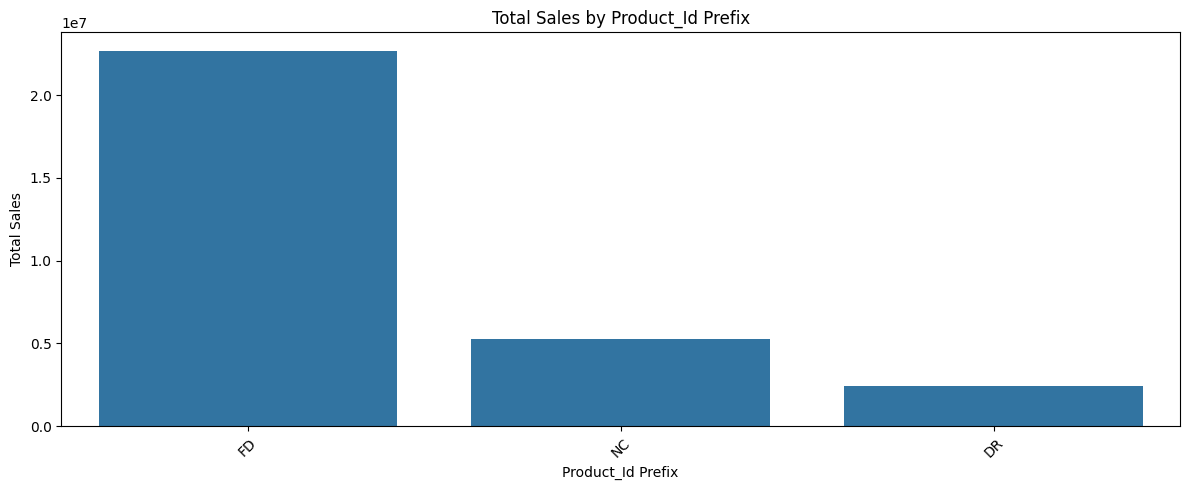

In [140]:
# Group by Product_Id_Prefix and sum Product_Store_Sales_Total
prefix_sales = kartData.groupby('Product_Id_Prefix')['Product_Store_Sales_Total'].sum().sort_values(ascending=False)
print(prefix_sales)

# Visualize the results
plt.figure(figsize=(12, 5))
sns.barplot(x=prefix_sales.index, y=prefix_sales.values)
plt.title('Total Sales by Product_Id Prefix')
plt.xlabel('Product_Id Prefix')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

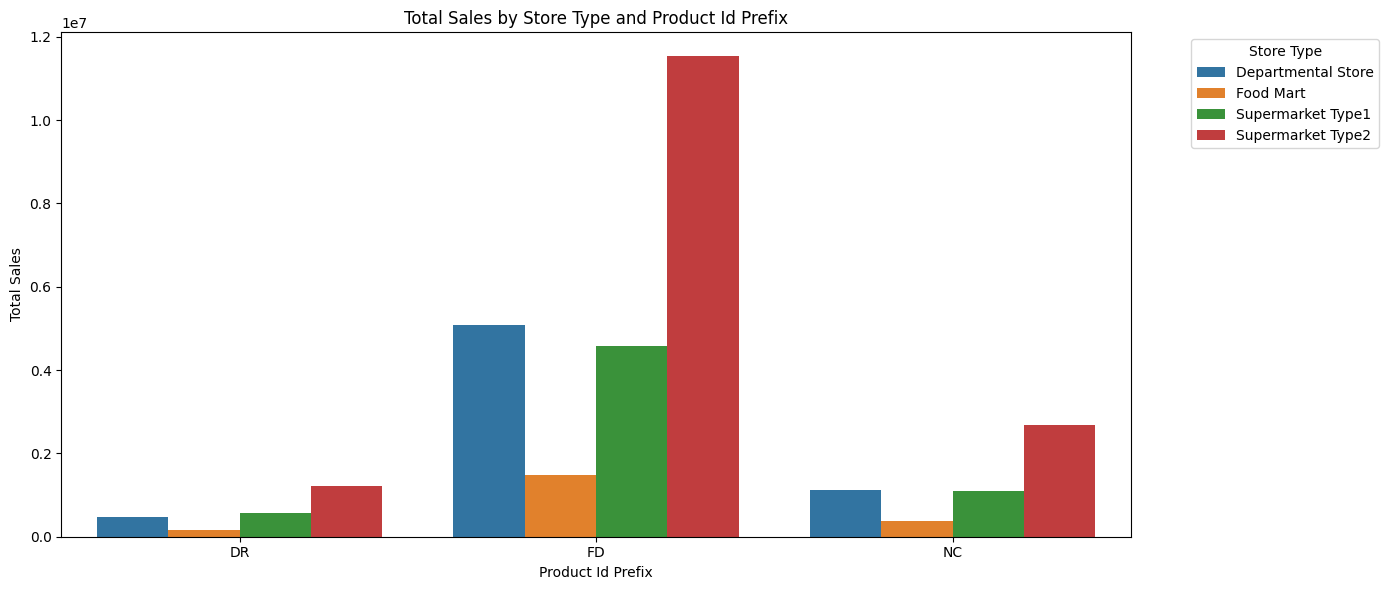

In [141]:
# Distribution of sales by Store_Type and Product_Id_Prefix
sales_by_storetype_prefix = kartData.groupby(['Store_Type', 'Product_Id_Prefix'])['Product_Store_Sales_Total'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=sales_by_storetype_prefix,
    x='Product_Id_Prefix',
    y='Product_Store_Sales_Total',
    hue='Store_Type'
)
plt.title('Total Sales by Store Type and Product Id Prefix')
plt.xlabel('Product Id Prefix')
plt.ylabel('Total Sales')
plt.legend(title='Store Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Observations
- as we saw in box plots, this is giving outliers count
- not a significant count
- Departmental stores may be due to high age showing large sales
- by grouping product id prefixes, we see perishable items are FD with more sales
- All stores carry all items
- super market type 2 is having higher sales here

# **Data Preprocessing**

In [142]:
# lets do preprocessing, as no null or missing values present lets do below things
# Add any new columsn needed
# standardize numerical columns
# onehot encode categorical columns

# Add a 'Perishable' column ("Yes"/"No") based on Product_Type
perishable_types = [
    "Dairy", "Fruits and Vegetables", "Meat", "Seafood", "Frozen Foods"
]

kartData["Perishable"] = kartData["Product_Type"].apply(
    lambda x: "Yes" if x in perishable_types else "No"
)

print(kartData[["Product_Type", "Perishable"]].head())

         Product_Type Perishable
0        Frozen Foods        Yes
1               Dairy        Yes
2              Canned         No
3        Baking Goods         No
4  Health and Hygiene         No


In [143]:
# Get unique prefixes for perishable items
perishable_prefixes = kartData[kartData['Perishable'] == 'Yes']['Product_Id_Prefix'].unique()
print("Product prefixes for perishable items:", perishable_prefixes)

Product prefixes for perishable items: ['FD']


In [144]:
kartData.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Id_Prefix,Perishable
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,16,FD,Yes
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,26,FD,Yes
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,38,FD,No
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,38,FD,No
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,27,NC,No


In [145]:
num_cols.remove('Store_Establishment_Year') if 'Store_Establishment_Year' in num_cols else None
# Check skewness for target and all numerical columns
print("Skewness for numerical columns:")
for col in num_cols:
    skew_val = kartData[col].skew()
    print(f"{col}: {skew_val:.2f}")

# Recommendation for transformation
print("\nTransformation suggestions:")
for col in num_cols:
    skew_val = kartData[col].skew()
    if abs(skew_val) > 1:
        print(f"- {col}: Highly skewed (|skew| > 1). Consider log or Box-Cox transformation.")
    elif abs(skew_val) > 0.5:
        print(f"- {col}: Moderately skewed (|skew| > 0.5). Consider sqrt or mild transformation.")
    else:
        print(f"- {col}: Approximately symmetric. No transformation needed.")

Skewness for numerical columns:
Product_Weight: 0.02
Product_Allocated_Area: 1.13
Product_MRP: 0.04
Product_Store_Sales_Total: 0.09

Transformation suggestions:
- Product_Weight: Approximately symmetric. No transformation needed.
- Product_Allocated_Area: Highly skewed (|skew| > 1). Consider log or Box-Cox transformation.
- Product_MRP: Approximately symmetric. No transformation needed.
- Product_Store_Sales_Total: Approximately symmetric. No transformation needed.


In [146]:
# Apply log transformation to Product_Allocated_Area (add small constant to avoid log(0))
kartData['Product_Allocated_Area_log'] = np.log1p(kartData['Product_Allocated_Area'])

In [147]:
kartData.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Id_Prefix,Perishable,Product_Allocated_Area_log
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,Medium,Tier 2,Supermarket Type2,2842.40,16,FD,Yes,0.026642
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,Medium,Tier 1,Departmental Store,4830.02,26,FD,Yes,0.134531
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,High,Tier 2,Supermarket Type1,4130.16,38,FD,No,0.030529
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,High,Tier 2,Supermarket Type1,4132.18,38,FD,No,0.106160
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,Small,Tier 3,Food Mart,2279.36,27,NC,No,0.009950


In [148]:
# lets also drop  the columns "Product_Id","Product_Type","Store_Id"
# Drop columns only if present in the DataFrame , got error when running multiple times
for col in ['Product_Id', 'Product_Type', 'Store_Id']:
    if col in kartData.columns:
        kartData.drop(col, axis=1, inplace=True)

In [149]:
# taking cat columns again 
categorical_features = kartData.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_Prefix',
 'Perishable']

In [150]:
preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore',drop='first'))]), categorical_features)
)# lets use this later when creating pipelines


In [151]:
kartData.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Id_Prefix,Perishable,Product_Allocated_Area_log
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,16,FD,Yes,0.026642
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,26,FD,Yes,0.134531
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,38,FD,No,0.030529
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,38,FD,No,0.106160
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,27,NC,No,0.009950


In [152]:
kartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_Weight              8763 non-null   float64
 1   Product_Sugar_Content       8763 non-null   object 
 2   Product_Allocated_Area      8763 non-null   float64
 3   Product_MRP                 8763 non-null   float64
 4   Store_Size                  8763 non-null   object 
 5   Store_Location_City_Type    8763 non-null   object 
 6   Store_Type                  8763 non-null   object 
 7   Product_Store_Sales_Total   8763 non-null   float64
 8   Store_Age                   8763 non-null   int64  
 9   Product_Id_Prefix           8763 non-null   object 
 10  Perishable                  8763 non-null   object 
 11  Product_Allocated_Area_log  8763 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 821.7+ KB


In [153]:
kartData['Perishable'] = kartData['Perishable'].map({'Yes': 1, 'No': 0})

In [154]:
kartData.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age,Product_Id_Prefix,Perishable,Product_Allocated_Area_log
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,16,FD,1,0.026642
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,26,FD,1,0.134531
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,38,FD,0,0.030529
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,38,FD,0,0.106160
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,27,NC,0,0.009950


#### Note
- since planning to use tree based models, we are not using any standard scalers as it is not necessary for numerical cols
- for catagorical cols , we are anyway using onehot encoding

In [155]:
y = kartData['Product_Store_Sales_Total']
X = kartData.drop('Product_Store_Sales_Total', axis=1)

In [156]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7010, 11)
X_test shape: (1753, 11)
y_train shape: (7010,)
y_test shape: (1753,)


# **Model Building**

## Define functions for Model Evaluation

In [157]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [158]:
# Define base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [159]:
# Create pipeline with preprocessing(onehot encoding) and Random Forest model
rf_pipeline = make_pipeline(preprocessor, rf_model)

In [160]:
# Train the model pipeline on the training data
rf_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [161]:
# Evaluate performance on training data
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline, X_train,y_train)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,603.576524,475.127716,0.678755,0.67825,0.172892


In [162]:
# Evaluate performance on test data
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline, X_test,y_test)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.38485,469.261562,0.686189,0.684206,0.168158


- only 68.6% variance can be explained b this model, we need to do hyper parameter tuning on the model to increase r square

# **Model Performance Improvement - Hyperparameter Tuning**

In [163]:
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV

model_1_fineTuned = RandomForestRegressor(random_state=42)
# Create pipeline with preprocessing and RandomForestRegressor model
rf_pipeline = make_pipeline(preprocessor, model_1_fineTuned)

# Grid of parameters to choose from
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300, 400],
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(rf_pipeline, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_1_fineTuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_1_fineTuned.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
# Evaluate performance on training data
model_1_fineTuned_train_perf = model_performance_regression(model_1_fineTuned, X_train, y_train)
print("Training performance \n")
model_1_fineTuned_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,604.12707,475.665632,0.678169,0.677663,0.17315


In [165]:
# Evaluate performance on test data
model_1_fineTuned_test_perf = model_performance_regression(model_1_fineTuned, X_test, y_test)
print("Testing performance \n")
model_1_fineTuned_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.071662,468.847943,0.686518,0.684537,0.168128


- The r squared is not much improved after the finetuning, lets try another model

In [166]:
model_2_xgb = XGBRegressor(random_state=42)
# Create pipeline with preprocessing and XGBRegressor model
model_2_xgb_pipeline = make_pipeline(preprocessor, model_2_xgb) 

#lets fit the simple model and test performance
model_2_xgb_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [167]:
# Evaluate performance on training data
model_2_xgb_pipeline_train_perf = model_performance_regression(model_2_xgb_pipeline, X_train, y_train)
print("Training performance \n")
model_2_xgb_pipeline_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,603.564446,474.896291,0.678768,0.678263,0.172852


In [168]:
# Evaluate performance on training data
model_2_xgb_pipeline_test_perf = model_performance_regression(model_2_xgb_pipeline, X_test, y_test)
print("Testing performance \n")
model_2_xgb_pipeline_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.369187,469.028946,0.686206,0.684223,0.168143


- the xgboost also did not show much improvement , lets try to finetune this.

In [169]:
from sklearn.model_selection import RandomizedSearchCV 

model_2_xgb_finetuned = XGBRegressor(random_state=42)

model_2_xgb_finetuned_pipeline = make_pipeline(preprocessor, model_2_xgb_finetuned)

# Check your pipeline step name
print(model_2_xgb_finetuned_pipeline.named_steps)

# let's define the parameters for tuning the XGBRegressor model
parameters_xgb = {
    'xgbregressor__n_estimators': [100, 150, 200],# estimators
    'xgbregressor__max_depth': [3, 4, 5, 6], # max depth
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],# learning_rate
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbregressor__colsample_bylevel': [0.6, 0.8, 1.0],
    'xgbregressor__reg_alpha': [0, 0.01, 0.1],
    'xgbregressor__reg_lambda': [1, 1.5, 2.0]
}

scorer_xgb = metrics.make_scorer(metrics.r2_score)

grid_obj_xgb = RandomizedSearchCV(model_2_xgb_finetuned_pipeline, 
                                  parameters_xgb, 
                                  scoring=scorer_xgb,
                                  cv=5,
                                  n_iter=100,
                                  random_state=42)

# Add early stopping when fitting
grid_obj_xgb.fit(
    X_train, y_train
)

# Best hyperparameters
print("Best hyperparameters found:")
print(grid_obj_xgb.best_params_)


# Set the best estimator
model_2_xgb_tuned = grid_obj_xgb.best_estimator_

# Fit the best algorithm to the training data
model_2_xgb_tuned.fit(X_train, y_train)


{'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Product_Sugar_Content', 'Store_Size',
                                  'Store_Location_City_Type', 'Store_Type',
                                  'Product_Id_Prefix', 'Perishable'])]), 'xgbregressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_thre

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [170]:
model_2_xgb_tuned_train_perf = model_performance_regression(model_2_xgb_tuned, X_train, y_train)
print("Training performance \n")
model_2_xgb_tuned_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,603.691071,475.11765,0.678633,0.678128,0.1729


In [171]:
model_2_xgb_tuned_test_perf = model_performance_regression(model_2_xgb_tuned, X_test, y_test)
print("Testing performance \n")
model_2_xgb_tuned_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.035193,469.008539,0.686556,0.684575,0.16817


- the xgb finetuning also not giving a good performance, even after tryingmutiple times with different params
- lets do a gradient Boost model adn see its performance to check if R squared crosses 80-90 %

In [172]:
# lets do gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor  

model_3_gbr = GradientBoostingRegressor(random_state=42)
# Create pipeline with preprocessing and GradientBoostingRegressor model
model_3_gbr_pipeline = make_pipeline(preprocessor, model_3_gbr) 
#lets fit the simple model and test performance
model_3_gbr_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('gradientboostingregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [173]:
model_3_gbr_pipeline_train_perf = model_performance_regression(model_3_gbr_pipeline, X_train, y_train)
print("Training performance \n")
model_3_gbr_pipeline_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,603.641313,475.140776,0.678686,0.678181,0.172957


In [174]:
model_3_gbr_pipeline_test_perf = model_performance_regression(model_3_gbr_pipeline, X_test, y_test)
print("Testing performance \n")
model_3_gbr_pipeline_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.029088,468.976115,0.686562,0.684582,0.168135


#### Note:-
- still the R-Squared is at 68.6, lets see if we can fine tune

In [175]:
model_3_gbr_finetuned = GradientBoostingRegressor(random_state=42)
model_3_gbr_finetuned_pipeline = make_pipeline(preprocessor, model_3_gbr_finetuned)

# Grid of parameters to choose from
param_grid_gbr = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingregressor__subsample': [0.6, 0.8, 1.0],
    'gradientboostingregressor__min_samples_split': [2, 5, 10],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 4]
}       

scorer_gbr = metrics.make_scorer(metrics.r2_score)

grid_obj_gbr = RandomizedSearchCV(model_3_gbr_finetuned_pipeline, 
                                  param_grid_gbr, 
                                  scoring=scorer_gbr,
                                  cv=5,
                                  n_iter=50,
                                  random_state=42)  
# Fit the grid search
grid_obj_gbr.fit(X_train, y_train)
# Best hyperparameters
print("Best hyperparameters found:")
print(grid_obj_gbr.best_params_)    
# Set the best estimator
model_3_gbr_finetuned = grid_obj_gbr.best_estimator_

# Fit the best algorithm to the training data
model_3_gbr_finetuned.fit(X_train, y_train)




Best hyperparameters found:
{'gradientboostingregressor__subsample': 1.0, 'gradientboostingregressor__n_estimators': 100, 'gradientboostingregressor__min_samples_split': 10, 'gradientboostingregressor__min_samples_leaf': 4, 'gradientboostingregressor__learning_rate': 0.1}


,steps,"[('columntransformer', ...), ('gradientboostingregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [176]:
model_3_gbr_finetuned_train_perf = model_performance_regression(model_3_gbr_finetuned, X_train, y_train)
print("Training performance \n")
model_3_gbr_finetuned_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,603.641313,475.140776,0.678686,0.678181,0.172957


In [177]:
model_3_gbr_finetuned_test_perf = model_performance_regression(model_3_gbr_finetuned, X_test, y_test)
print("Testing performance \n")
model_3_gbr_finetuned_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,598.029088,468.976115,0.686562,0.684582,0.168135


- somehow all models are giving 68.6 r squared , lets try to do bagging and see if it improves

In [178]:
# Bagging Regressor with DecisionTreeRegressor as base
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_4_bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model_4_bagging_pipeline = make_pipeline(preprocessor, model_4_bagging_model)
model_4_bagging_pipeline.fit(X_train, y_train)

# Evaluate performance on training data
model_4_bagging_train_perf = model_performance_regression(model_4_bagging_pipeline, X_train, y_train)
print("Bagging Regressor Training performance\n")
print(model_4_bagging_train_perf)

# Evaluate performance on test data
model_4_bagging_test_perf = model_performance_regression(model_4_bagging_pipeline, X_test, y_test)
print("Bagging Regressor Testing performance\n")
print(model_4_bagging_test_perf)

Bagging Regressor Training performance

         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  603.576524  475.127716   0.678755         0.67825  0.172892
Bagging Regressor Testing performance

        RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  598.38485  469.261562   0.686189        0.684206  0.168158


/Users/parvatam/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/parvatam/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/parvatam/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refr

In [179]:
# Fine-tuning BaggingRegressor with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


model_4_bagging_model_finetuned = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model_4_bagging_model_finetuned_pipeline = make_pipeline(preprocessor, model_4_bagging_model_finetuned)

param_grid_bagging = {
    'baggingregressor__n_estimators': [50, 100, 200, 300],
    'baggingregressor__max_samples': [0.6, 0.8, 1.0],
    'baggingregressor__max_features': [0.6, 0.8, 1.0],
    'baggingregressor__estimator__max_depth': [3, 5, 7, 10, None],
    'baggingregressor__estimator__min_samples_split': [2, 5, 10]
}

bagging_search = RandomizedSearchCV(
    model_4_bagging_model_finetuned_pipeline,
    param_distributions=param_grid_bagging,
    n_iter=30,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1
)

bagging_search.fit(X_train, y_train)
print("Best BaggingRegressor Params:", bagging_search.best_params_)

# Evaluate on test data
model_4_bagging_model_finetuned = bagging_search.best_estimator_

model_4_bagging_model_finetuned.fit(X_train, y_train)

Best BaggingRegressor Params: {'baggingregressor__n_estimators': 100, 'baggingregressor__max_samples': 0.8, 'baggingregressor__max_features': 1.0, 'baggingregressor__estimator__min_samples_split': 10, 'baggingregressor__estimator__max_depth': 3}


,steps,"[('columntransformer', ...), ('baggingregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [180]:
model_4_bagging_model_finetuned_train_perf = model_performance_regression(model_4_bagging_model_finetuned, X_train, y_train)
print("Fine-tuned Bagging Regressor Training performance\n")
print(model_4_bagging_model_finetuned_train_perf)

Fine-tuned Bagging Regressor Training performance

         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  604.718311  476.384029   0.677539        0.677032  0.173313


In [181]:
model_4_bagging_model_finetuned_test_perf = model_performance_regression(model_4_bagging_model_finetuned, X_test, y_test)
print("Fine-tuned Bagging Regressor Testing performance\n")
print(model_4_bagging_model_finetuned_test_perf)

Fine-tuned Bagging Regressor Testing performance

         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  595.632012  468.368022    0.68907        0.687105  0.167811


# **Model Performance Comparison, Final Model Selection, and Serialization**

# **Deployment - Backend**

## Flask Web Framework


## Dependencies File

## Dockerfile

## Setting up a Hugging Face Docker Space for the Backend

## Uploading Files to Hugging Face Space (Docker Space)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

## Dependencies File

## DockerFile

In [182]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


FileNotFoundError: [Errno 2] No such file or directory: 'frontend_files/Dockerfile'

## Uploading Files to Hugging Face Space (Streamlit Space)

# **Actionable Insights and Business Recommendations**

**Actionable Observations**

